In [147]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [148]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
# training_data = training_data.fillna(0)
# test_data = test_data.fillna(0)

In [149]:
test_values = [(x['Id'],x['LotFrontage'],x['LotArea'],x['YearBuilt'],x['YearRemodAdd'], x['MasVnrArea'], x['BsmtFinSF1'], x['BsmtFinSF2'], x['BsmtUnfSF'], x['TotalBsmtSF'], x['1stFlrSF'], x['2ndFlrSF'], x['LowQualFinSF'], x['GrLivArea'], x['BsmtFullBath'], x['BsmtHalfBath'], x['FullBath'], x['HalfBath'], x['BedroomAbvGr'], x['KitchenAbvGr'], x['TotRmsAbvGrd'], x['Fireplaces'], x['GarageYrBlt'], x['GarageCars'], x['GarageArea'], x['WoodDeckSF'], x['OpenPorchSF'], x['EnclosedPorch'], x['3SsnPorch'], x['ScreenPorch'], x['PoolArea'], x['MiscVal'], x['MoSold'], x['YrSold']) for index, x in df_test.iterrows()]

In [150]:
useful_values = []
for index, x in df_train.iterrows():
    useful_values.append((x['Id'],x['LotFrontage'],x['LotArea'],x['YearBuilt'],x['YearRemodAdd'], x['MasVnrArea'], x['BsmtFinSF1'], x['BsmtFinSF2'], x['BsmtUnfSF'], x['TotalBsmtSF'], x['1stFlrSF'], x['2ndFlrSF'], x['LowQualFinSF'], x['GrLivArea'], x['BsmtFullBath'], x['BsmtHalfBath'], x['FullBath'], x['HalfBath'], x['BedroomAbvGr'], x['KitchenAbvGr'], x['TotRmsAbvGrd'], x['Fireplaces'], x['GarageYrBlt'], x['GarageCars'], x['GarageArea'], x['WoodDeckSF'], x['OpenPorchSF'], x['EnclosedPorch'], x['3SsnPorch'], x['ScreenPorch'], x['PoolArea'], x['MiscVal'], x['MoSold'], x['YrSold'], x['SalePrice']))

In [151]:
import scipy
from sklearn import svm
import numpy as np
print(np.max(useful_values))

nan


In [152]:
#check the decoration
df_train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [153]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

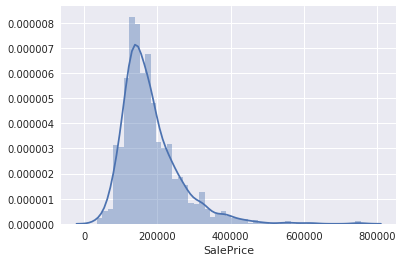

In [154]:
#histogram
sns.distplot(df_train['SalePrice']);

In [155]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


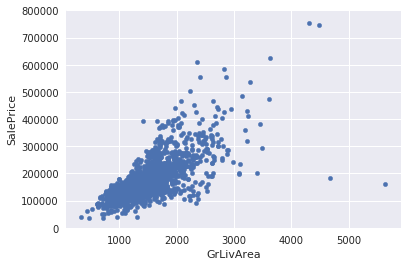

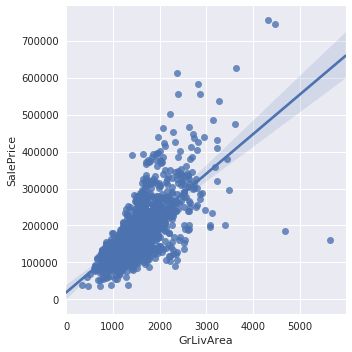

In [156]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
sns.lmplot(x=var, y='SalePrice',data=data,fit_reg=True)

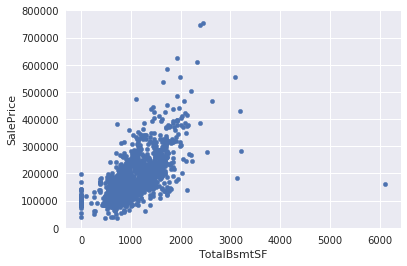

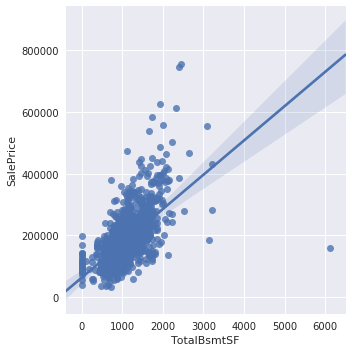

In [157]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
sns.lmplot(x=var, y='SalePrice',data=data,fit_reg=True)

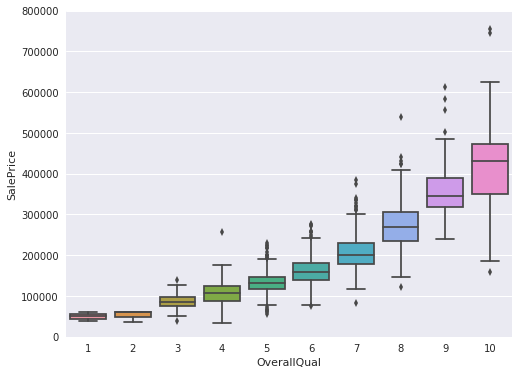

In [158]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

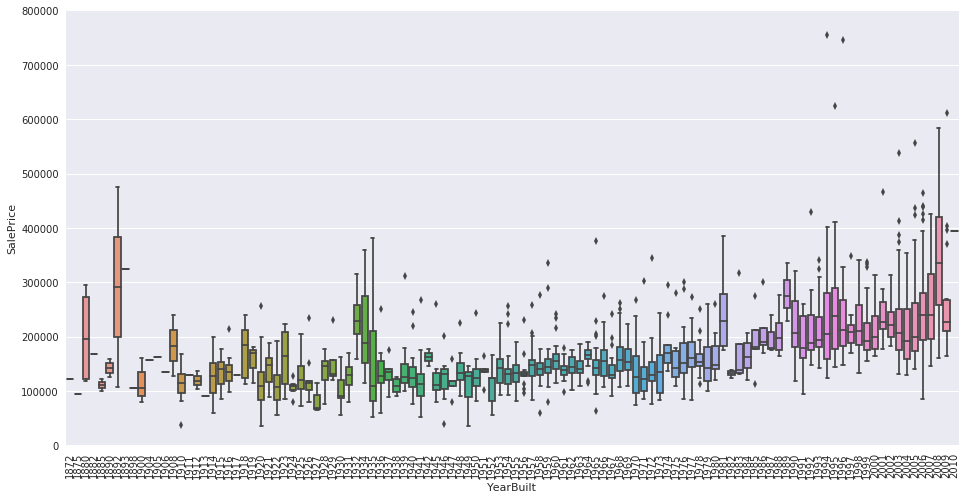

In [159]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

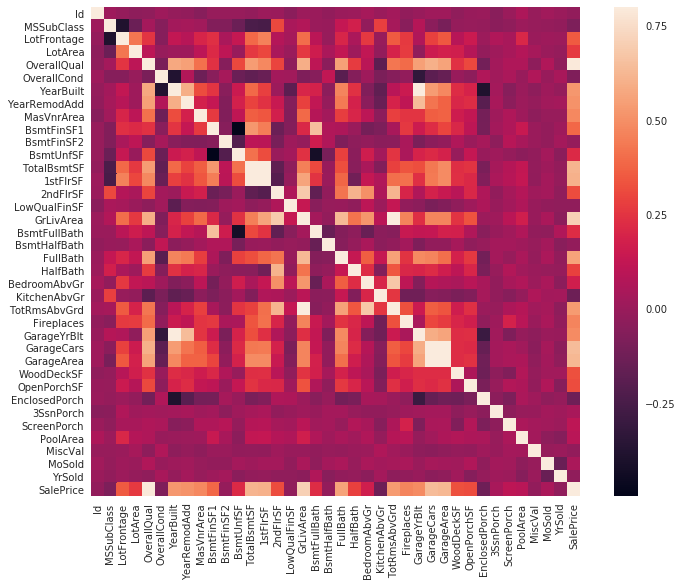

In [160]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

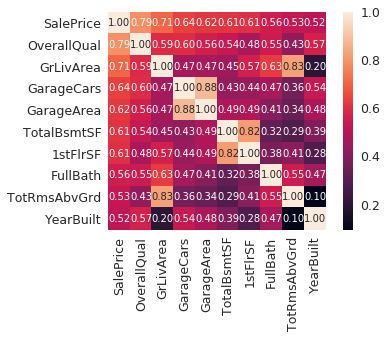

In [161]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

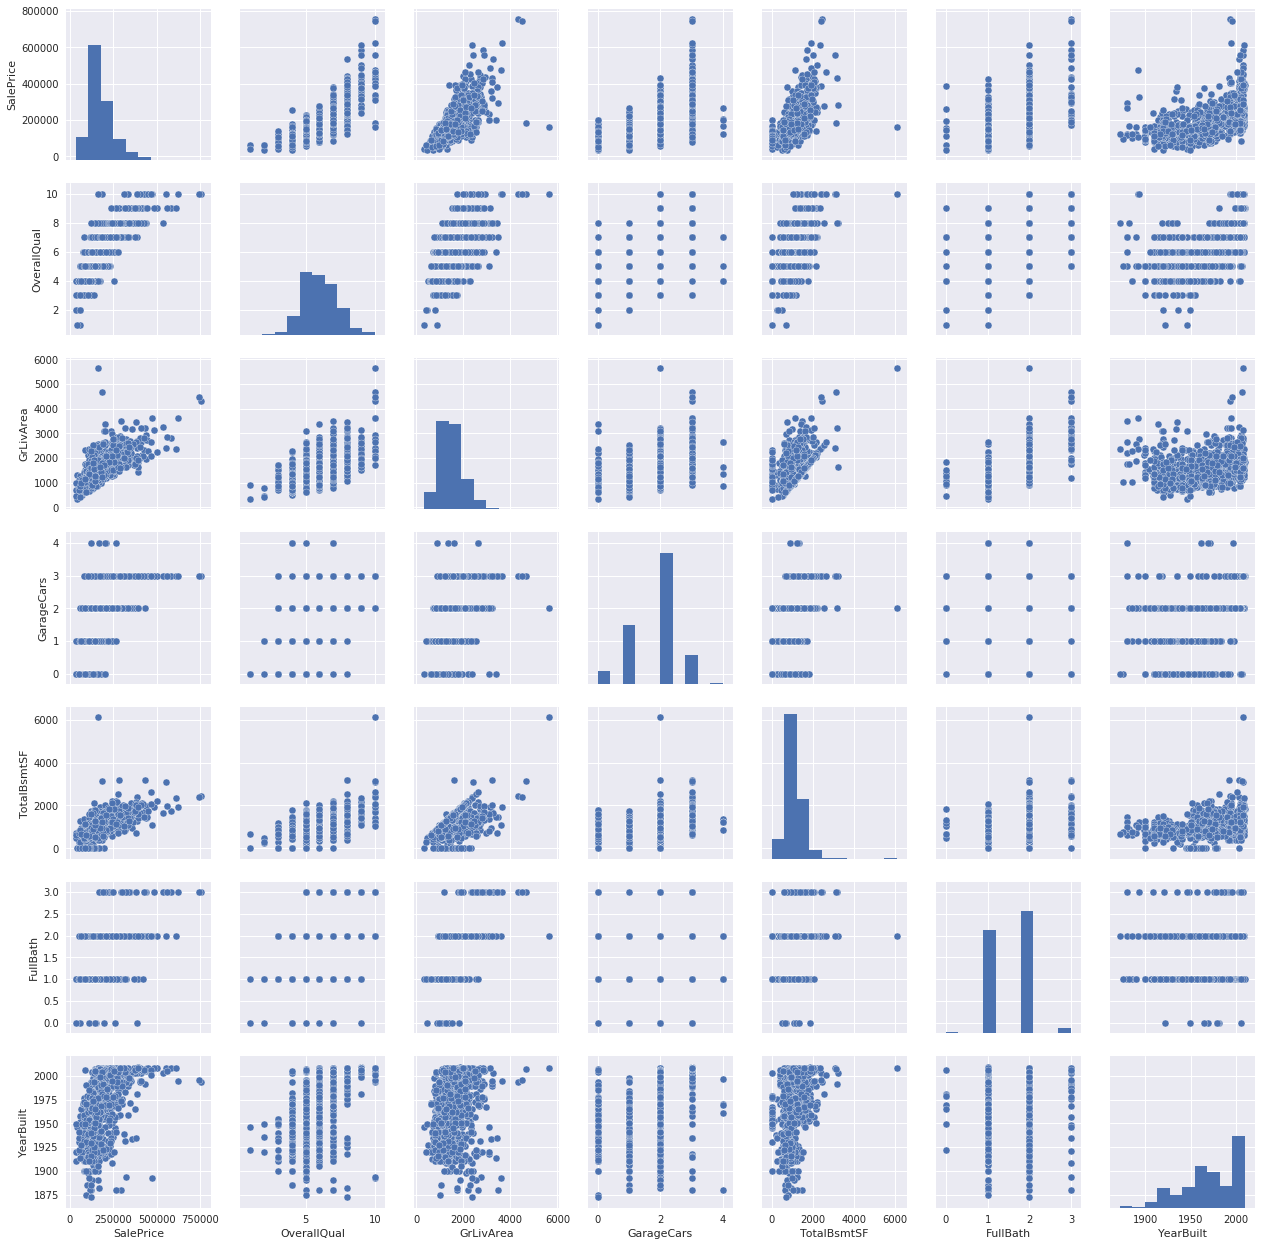

In [162]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [163]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [164]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [165]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


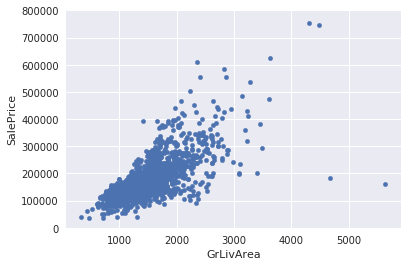

In [166]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [167]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

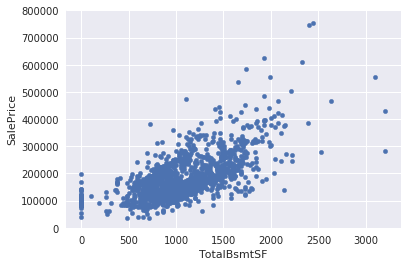

In [168]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [169]:
indexes = df_train.sort_values(by = 'TotalBsmtSF', ascending = False)[:3]
for idx, row in indexes.iterrows():
    df_train = df_train.drop(df_train[df_train['Id'] == row['Id']].index)

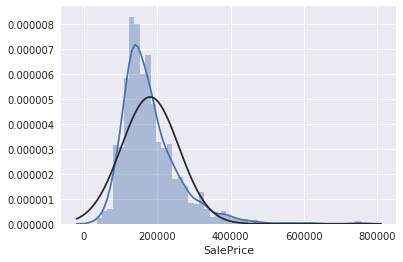

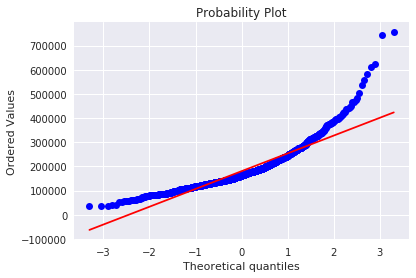

In [170]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [171]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

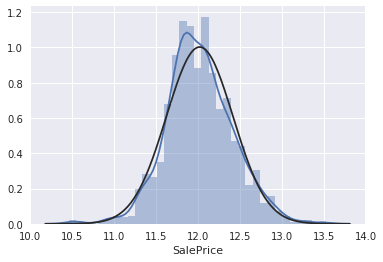

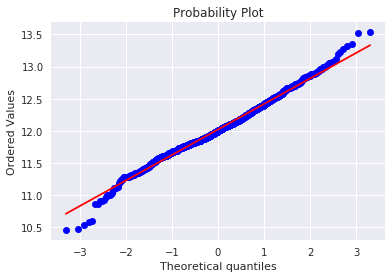

In [172]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

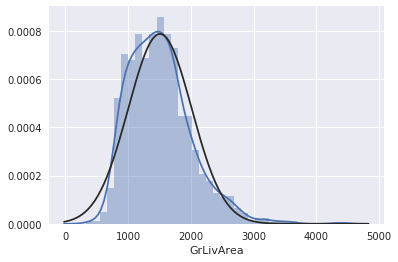

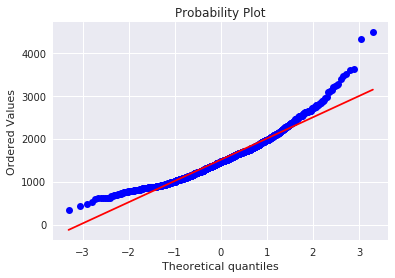

In [173]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [174]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

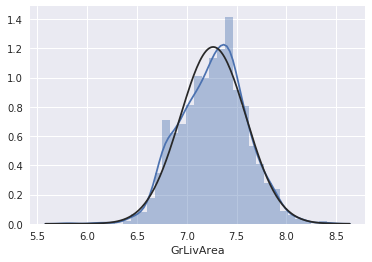

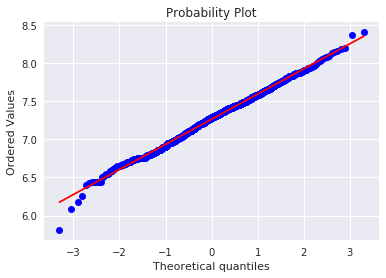

In [175]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

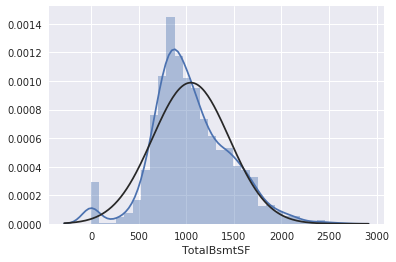

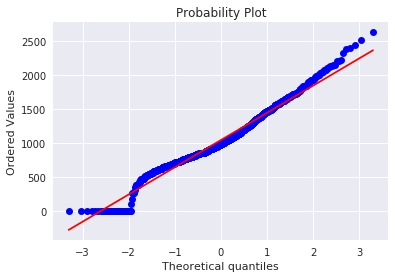

In [176]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [177]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [178]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

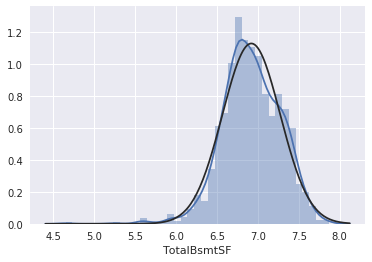

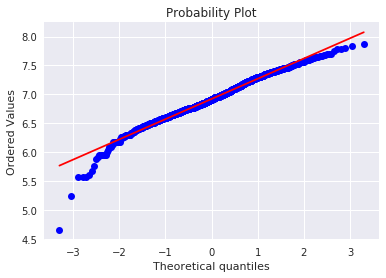

In [179]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

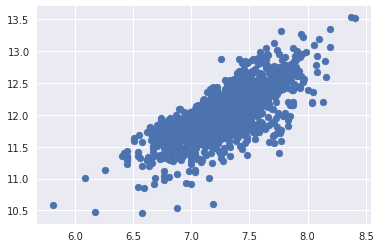

In [180]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

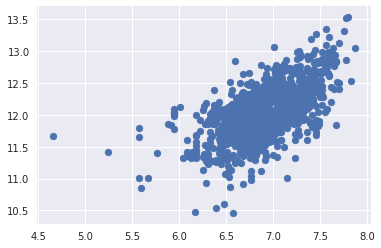

In [181]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [182]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [183]:
df_train_selection = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]

In [184]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [185]:
clf.fit(df_train_selection, df_train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [186]:
#perform all adaptions on the test data!
df_test['HasBsmt'] = pd.Series(len(df_test['TotalBsmtSF']), index=df_test.index)
df_test['HasBsmt'] = 0 
df_test.loc[df_test['TotalBsmtSF']>0,'HasBsmt'] = 1
df_test.loc[df_test['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])
# df_test['SalePrice'] = np.log(df_test['SalePrice'])
df_test[:661]
df_test_adapt = df_test[['Id', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
df_test_adapt = df_test_adapt.fillna(0)

In [200]:
predictions = []
for indx, row in df_test_adapt.iterrows():
    predictions.append([int(row['Id']), np.exp(float(clf.predict(row[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']])))])


In [198]:
out = pd.DataFrame(predictions, columns= ['Id', 'SalePrice'])
out

,Id,SalePrice
0,1461,110206.637826
1,1462,148685.208462
2,1463,172366.000706
3,1464,189773.838586
4,1465,207074.914052
5,1466,188748.010878
6,1467,162541.017823
7,1468,180543.053982
8,1469,195957.532107
9,1470,110134.028201


In [199]:
out.to_csv('output.csv', index = False, header = True)

In [193]:
logs = [ 1,2,3,np.exp(1)]
new = np.log(logs)
new2 = np.exp(new)
print(logs)
print(new)
print(new2)

[1, 2, 3, 2.7182818284590451]
[ 0.          0.69314718  1.09861229  1.        ]
[ 1.          2.          3.          2.71828183]


In [219]:
from sklearn.kernel_ridge import KernelRidg
from sklearn.neighbors import KNeighborsRegressor
svm1 = KernelRidge(alpha=1.0
svm1.fit(df_train_selection, df_train['SalePrice'])
predictions2 =  []
for indx, row in df_test_adapt.iterrows():
    predictions2.append([int(row['Id']), np.exp(float(svm1.predict(row[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']])))])
ou2 = pd.DataFrame(predictions2, columns= ['Id', 'SalePrice'])
ou2.to_csv('output1.csv', index = False, header = True)
ou2

SyntaxError: invalid syntax (<ipython-input-219-29eaa6dc430e>, line 4)

In [203]:
from sklearn                        import metrics, svm
from sklearn.linear_model           import LinearRegression
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC

trainingData    = df_train_selection
trainingScores  = df_train['SalePrice']
predictionData  = np.exp(float(clf.predict(row[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']])))

clf = LinearRegression()
clf.fit(trainingData, trainingScores)
print("LinearRegression")
print(clf.predict(predictionData))

clf = svm.SVR()
clf.fit(trainingData, trainingScores)
print("SVR")
print(clf.predict(predictionData))

clf = LogisticRegression()
clf.fit(trainingData, trainingScores)
print("LogisticRegression")
print(clf.predict(predictionData))

clf = DecisionTreeClassifier()
clf.fit(trainingData, trainingScores)
print("DecisionTreeClassifier")
print(clf.predict(predictionData))

clf = KNeighborsClassifier()
clf.fit(trainingData, trainingScores)
print("KNeighborsClassifier")
print(clf.predict(predictionData))

clf = LinearDiscriminantAnalysis()
clf.fit(trainingData, trainingScores)
print("LinearDiscriminantAnalysis")
print(clf.predict(predictionData))

clf = GaussianNB()
clf.fit(trainingData, trainingScores)
print("GaussianNB")
print(clf.predict(predictionData))

clf = SVC()
clf.fit(trainingData, trainingScores)
print("SVC")
print(clf.predict(predictionData))

LinearRegression


ValueError: shapes (1,1) and (6,) not aligned: 1 (dim 1) != 6 (dim 0)

In [209]:
ou2
out

,Id,SalePrice
0,1461,110206.637826
1,1462,148685.208462
2,1463,172366.000706
3,1464,189773.838586
4,1465,207074.914052
5,1466,188748.010878
6,1467,162541.017823
7,1468,180543.053982
8,1469,195957.532107
9,1470,110134.028201


In [210]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [220]:
display_side_by_side(ou2,out)

,Id,SalePrice
0,1461,130362.550808
1,1462,146537.829621
2,1463,193064.481377
3,1464,182864.775759
4,1465,239403.027156
5,1466,173438.879018
6,1467,178939.554137
7,1468,182416.572388
8,1469,180121.539397
9,1470,116851.044165


In [ ]:
#KNN is not better

In [1]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

/usr/local/lib/python2.7/dist-packages/mlbox/preprocessing/drift/__init__.py:9: UserWarning: ipCluster is starting. Please wait 30 sec and check in terminal that 'the engines appear to have started successfully'.
  warnings.warn("ipCluster is starting. "
Using Theano backend.
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
paths = ["train.csv", 'test.csv'] #to modify
target_name = "SalePrice" #to modify

In [10]:
data = Reader(sep=",").train_test_split(paths, target_name)  #reading
data = Drift_thresholder().fit_transform(data)  #deleting non-stable variables


reading csv : train.csv ...
cleaning data...
CPU time: 0.227972984314 seconds

reading csv : test.csv ...
cleaning data...
CPU time: 0.237680912018 seconds

number of common features : 80

Gathering and crunching for train and test datasets
reindexing for train and test datasets
Dropping training duplicates
Dropping constant variables on training set

number of categorical features: 43
number of numerical features: 37
number of training samples : 1460
number of test samples : 1459

Top sparse features (% missing values on train set):
PoolQC         99.5
MiscFeature    96.3
Alley          93.8
Fence          80.8
FireplaceQu    47.3
dtype: float64

task : regression

computing drifts...
CPU time: 1.16899108887 seconds

Top 10 drifts

('Id', 1.0)
('2ndFlrSF', 0.043727406089464349)
('FireplaceQu', 0.042353711516121217)
('Exterior1st', 0.040058391064138776)
('HeatingQC', 0.037907300453223325)
('GrLivArea', 0.034105310873727035)
('TotRmsAbvGrd', 0.030938611129773586)
('BsmtFinType1', 0.030

In [15]:
Optimiser().evaluate(None, data)
print('hoi')

No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'num_leaves': 31, 'reg_alpha': 0, 'subsample_for_bin': 50000, 'colsample_bytree': 0.8, 'silent': True, 'max_depth': -1, 'learning_rate': 0.05, 'nthread': -1, 'min_child_weight': 5, 'strategy': 'LightGBM', 'n_estimators': 500, 'subsample': 0.9, 'reg_lambda': 0, 'subsample_freq': 1, 'max_bin': 255, 'objective': 'regression', 'min_split_gain': 0, 'seed': 0, 'min_child_samples': 10, 'boosting_type': 'gbdt'}



/usr/local/lib/python2.7/dist-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)



MEAN SCORE : mean_squared_error = -2855351974.19
VARIANCE : 94738617.3159 (fold 1 = -2760613356.87, fold 2 = -2950090591.5)
CPU time: 1.43277406693 seconds

hoi


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)



No parameters set. Default configuration is tested

fitting the pipeline...
CPU time: 1.03223705292 seconds

dumping feature importances into directory : save


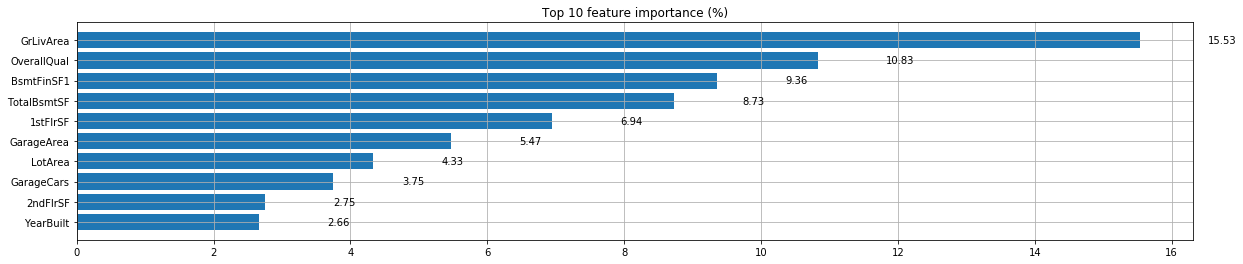


predicting...
CPU time: 0.0733008384705 seconds

top 10 predictions :

   SalePrice_predicted
0        133808.500434
1        145304.292824
2        167611.027136
3        181850.128755
4        202174.180770
5        177384.577502
6        168925.779934
7        168007.372976
8        183073.468429
9        131456.203373

dumping predictions into directory : save


<mlbox.prediction.predictor.Predictor instance at 0x7f4fbce755a8>

In [16]:
Predictor().fit_predict(None, data)